In [17]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [18]:
im = cv2.imread('img/tulips.jpeg')

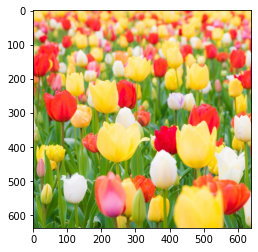

In [19]:
plt.imshow(im[:,:, ::-1])

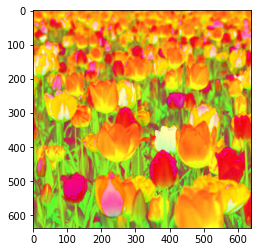

In [20]:
hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
plt.imshow(hsv[:, :, ::-1])

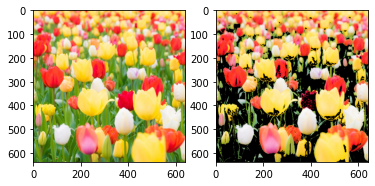

In [21]:
# images with all colors (first value from 0 to 255), high saturation and high value (let's start from top 20%)
low_bound = np.array([0, 0, 160])
upper_bound = np.array([255, 250, 255])

# create a mask
mask_bright = cv2.inRange(hsv, low_bound, upper_bound)

# back to BGR to apply mask
bright_zones = cv2.bitwise_and(im, im, mask=mask_bright)
# plot original and result
plt.figure(1)
plt.subplot(121)
plt.imshow(im[:,:,::-1])
plt.subplot(122)
plt.imshow(bright_zones[:,:,::-1])
plt.show()

* doesn't capture white color

Capture brightness through converting to grayscale image

In [22]:
gr = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

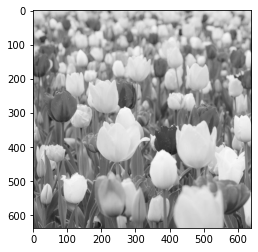

In [23]:
plt.imshow(gr, cmap='gray')

In [25]:
cv2.minMaxLoc(gr)

(14.0, 255.0, (400, 418), (603, 319))

In [26]:
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(gr)

In [27]:
gr.shape

(638, 640)

In [28]:
gr[:5]

array([[227, 227, 227, ..., 194, 190, 186],
       [227, 227, 227, ..., 203, 199, 195],
       [226, 226, 226, ..., 210, 206, 204],
       [225, 225, 226, ..., 213, 210, 208],
       [224, 224, 225, ..., 216, 213, 211]], dtype=uint8)

In [29]:
gr_mask = np.where(gr > 200, 255, 0)

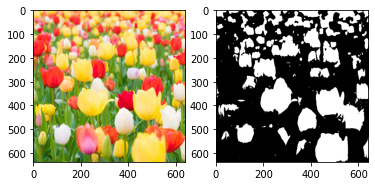

In [30]:
# plot original and result
plt.figure(1)
plt.subplot(121)
plt.imshow(im[:,:,::-1])
plt.subplot(122)
plt.imshow(gr_mask, cmap='gray')
plt.show()

Back to HSV, let's see if I can capture white as well

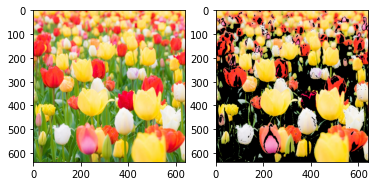

In [31]:
# define range of white color in HSV
# change it according to your need !
lower_white = np.array([0,0,168], dtype=np.uint8)
upper_white = np.array([172,255,255], dtype=np.uint8)

# Threshold the HSV image to get only white colors
mask_white = cv2.inRange(hsv, lower_white, upper_white)

mask = mask_bright | mask_white
result = cv2.bitwise_and(im, im, mask=mask_white)
# plot original and result
plt.figure(1)
plt.subplot(121)
plt.imshow(im[:,:,::-1])
plt.subplot(122)
plt.imshow(result[:,:,::-1])
plt.show()

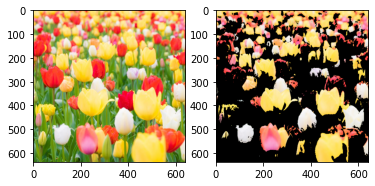

In [27]:
# define range of white color in HSV
# change it according to your need !
lower_white = np.array([0,0,168], dtype=np.uint8)
upper_white = np.array([172,20,255], dtype=np.uint8)

# Threshold the HSV image to get only white colors
mask_white = cv2.inRange(hsv, lower_white, upper_white)

mask = mask_bright | mask_white
result = cv2.bitwise_and(im, im, mask=mask)
# plot original and result
plt.figure(1)
plt.subplot(121)
plt.imshow(im[:,:,::-1])
plt.subplot(122)
plt.imshow(result[:,:,::-1])
plt.show()

Mask contains only 2 values - 0 and 255.
If the pixel satisfy the requirments, it's 255, otherwise - 0

In [69]:
np.unique(mask)

array([  0, 255], dtype=uint8)

In [46]:
# doesn't capture white

In [41]:
mask.dtype, gr_mask.dtype

(dtype('uint8'), dtype('int64'))

In [36]:
mask.shape, gr_mask.shape

((638, 640), (638, 640))

In [42]:
gr_mask.dtype = 'uint8'

In [44]:
gr_mask.dtype

dtype('uint8')

In [68]:
# throws an error, doesn't accept gray mask
#result_gr = cv2.bitwise_and(im, im, mask=gr_mask)

In [32]:
blue = cv2.imread('img/blue.jpeg')

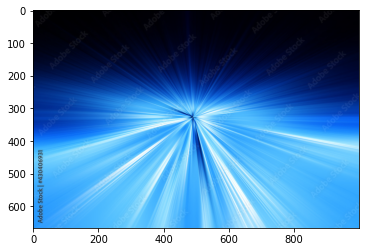

In [33]:
plt.imshow(blue[:, :, ::-1]);

In [34]:
blue_hsv = cv2.cvtColor(blue, cv2.COLOR_BGR2HSV)

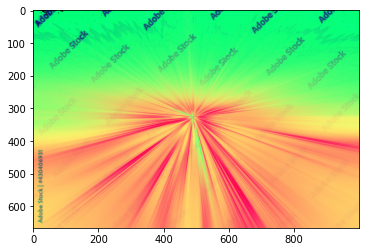

In [35]:
plt.imshow(blue_hsv[:, :, ::-1]);

In [36]:


# create a mask
mask_bright_blue = cv2.inRange(blue_hsv, low_bound, upper_bound)

# Threshold the HSV image to get only white colors
mask_white_blue = cv2.inRange(blue_hsv, lower_white, upper_white)

mask_blue = mask_bright_blue | mask_white_blue

blue_result = cv2.bitwise_and(blue, blue, mask=mask_blue)

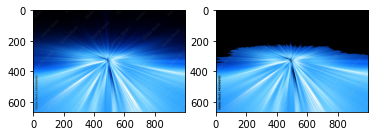

In [37]:
# plot original and result
plt.figure(1)
plt.subplot(121)
plt.imshow(blue[:,:,::-1])
plt.subplot(122)
plt.imshow(blue_result[:,:,::-1])
plt.show()

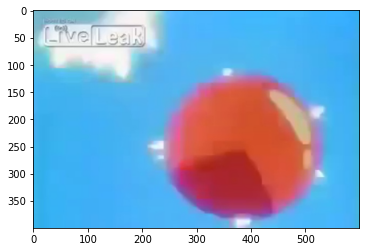

In [38]:
img40 = cv2.imread('img/img40.jpg')
plt.imshow(img40[:,:, ::-1])

In [40]:
img40_hsv = cv2.cvtColor(img40, cv2.COLOR_BGR2HSV)

In [43]:
mask_img40 = cv2.inRange(img40_hsv, low_bound, upper_bound)
mask_img40_white = cv2.inRange(img40_hsv, lower_white, upper_white)
mask_img40 = mask_img40 | mask_img40_white
result_img40 = cv2.bitwise_and(img40, img40, mask_img40)

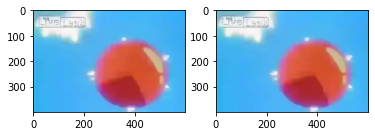

In [44]:
# plot original and result
plt.figure(1)
plt.subplot(121)
plt.imshow(img40[:,:,::-1])
plt.subplot(122)
plt.imshow(result_img40[:,:,::-1])
plt.show()

### convert to HLS 

In [5]:
img_hls = cv2.cvtColor(im, cv2.COLOR_BGR2HLS)
blue_hls = cv2.cvtColor(blue, cv2.COLOR_BGR2HLS)
img40_hls = cv2.cvtColor(img40, cv2.COLOR_BGR2HLS)

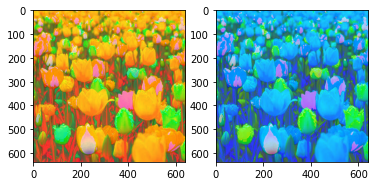

In [33]:
# i just love all these crazy color conversions when you tranlate them to RGB
plt.figure(1)
plt.subplot(121)
plt.imshow(img_hls[:, :, ::-1])
plt.subplot(122)
plt.imshow(img_hls);

In [71]:
lower_hls = np.array([0, 240, 0], dtype=np.uint8)
upper_hls = np.array([255, 255, 30], dtype = np.uint8)
# create masks for each image
mask_im_hls = cv2.inRange(img_hls, lower_hls, upper_hls)
mask_blue_hls = cv2.inRange(blue_hls, lower_hls, upper_hls)
mask_img40_hls = cv2.inRange(img40_hls, lower_hls, upper_hls)
# apply masks
res_hls_im = cv2.bitwise_and(im, im, mask_im_hls)
res_hls_blue = cv2.bitwise_and(blue, blue, mask_blue_hls)
res_hls_img40 = cv2.bitwise_and(img40, img40, mask_img40_hls)


In [57]:
np.unique(mask_im_hls)

array([  0, 255], dtype=uint8)

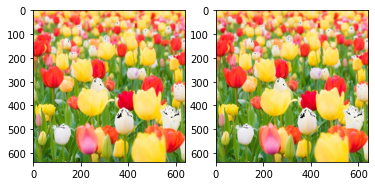

In [72]:
plt.figure(1)
plt.subplot(121)
plt.imshow(im[:,:,::-1])
plt.subplot(122)
plt.imshow(res_hls_im[:,:,::-1])
plt.show()

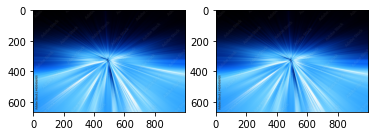

In [73]:
plt.figure(1)
plt.subplot(121)
plt.imshow(blue[:,:,::-1])
plt.subplot(122)
plt.imshow(res_hls_blue[:,:,::-1])
plt.show()

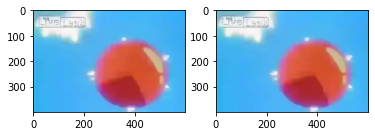

In [74]:
plt.figure(1)
plt.subplot(121)
plt.imshow(img40[:,:,::-1])
plt.subplot(122)
plt.imshow(res_hls_img40[:,:,::-1])
plt.show()

It didn't do anything. Let's try second approach with the `blue` image only.

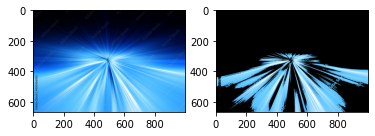

In [8]:
Lchannel = blue_hls[:,:,1]
mask1 = cv2.inRange(Lchannel, 170, 255)
res1 = cv2.bitwise_and(blue,blue, mask= mask1)
plt.figure(1)
plt.subplot(121)
plt.imshow(blue[:,:,::-1])
plt.subplot(122)
plt.imshow(res1[:,:,::-1])
plt.show()

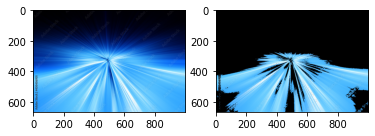

In [86]:
# same mask as above with 1 line of code
mask2 = cv2.inRange(blue_hls, np.array([0,160,0]), np.array([255,255,255]))
# apply and plot
res2 = cv2.bitwise_and(blue,blue, mask= mask1)
plt.figure(1)
plt.subplot(121)
plt.imshow(blue[:,:,::-1])
plt.subplot(122)
plt.imshow(res2[:,:,::-1])
plt.show()

Let's try this approach with other images

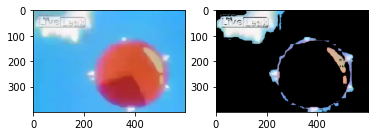

In [14]:
Lchannel_img40 = img40_hls[:,:,1]
mask1 = cv2.inRange(Lchannel_img40, 170, 255)
res1_img40 = cv2.bitwise_and(img40,img40, mask= mask1)
plt.figure(1)
plt.subplot(121)
plt.imshow(img40[:,:,::-1])
plt.subplot(122)
plt.imshow(res1_img40[:,:,::-1])
plt.show()

In [16]:
mask1.shape, img40.shape

((400, 600), (400, 600, 3))

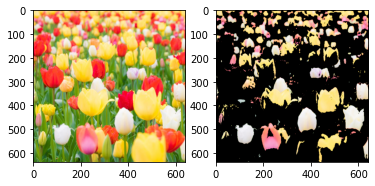

In [10]:
Lchannel_img = img_hls[:,:,1]
mask1 = cv2.inRange(Lchannel_img, 180, 255)
res1_img = cv2.bitwise_and(im,im, mask= mask1)
plt.figure(1)
plt.subplot(121)
plt.imshow(im[:,:,::-1])
plt.subplot(122)
plt.imshow(res1_img[:,:,::-1])
plt.show()